In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import curve_fitting as cf
import bluepyopt.deapext.algorithms as algo
import generalized_genSim_shorten_time as ggsd
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

In [2]:
currh = ggsd.Activation(channel_name = 'na16').h

In [3]:
def set_param(param_values):
    currh.sh_na16 = param_values[0]
    currh.tha_na16 = param_values[1]
    currh.qa_na16 = param_values[2]
    currh.Ra_na16 = param_values[3]
    currh.Rb_na16 = param_values[4]
    currh.thi1_na16 = param_values[5]
    currh.thi2_na16 = param_values[6]
    currh.qd_na16 = param_values[7]
    currh.qg_na16 = param_values[8]
    currh.mmin_na16 = param_values[9]
    currh.hmin_na16 = param_values[10]
    currh.q10_na16 = param_values[11]
    currh.Rg_na16 = param_values[12]
    currh.Rd_na16 = param_values[13]
    currh.qq_na16 = param_values[14]
    currh.tq_na16 = param_values[15]
    currh.thinf_na16 = param_values[16]
    currh.qinf_na16 = param_values[17]
    currh.vhalfs_na16 = param_values[18]
    currh.a0s_na16 = param_values[19]
    currh.zetas_na16 = param_values[20]
    currh.gms_na16 = param_values[21]
    currh.smax_na16 = param_values[22]
    currh.vvh_na16 = param_values[23]
    currh.vvs_na16 = param_values[24]
    currh.Ena_na16 = param_values[25]

In [4]:
# WT params

param_values_wt = [8.0,
 -35.0,
 7.2,
 0.4,
 0.124,
 -45.0,
 -45.0,
 0.5,
 1.5,
 0.02,
 0.01,
 2.0,
 0.01,
 0.03,
 10.0,
 -55.0,
 -55.0,
 7.0,
 -60.0,
 0.0003,
 12.0,
 0.2,
 10.0,
 -58.0,
 2.0,
 55.0]

In [5]:
# 109 generations 1st try (+-30)


param_values11 = [-4.838063776211033, -6.500868221860941, 3.0809057790559757, -15.655102845474135, 8.799507381501677, -52.90996308809248, -74.79684105148111, 24.544195740363534, 14.461408869921101, 0.34813950167300955, 7.0066834785240815, 14.241550185510228, -10.74321301843419, -8.834740381393, 17.80093872902765, -67.05194585707177, -74.15170402661235, -8.856267140905459, -36.656273955245545, -22.559752179891838, 28.463517044761037, 0.6573817354712941, 35.302494608144734, -42.806577468440324, -25.10600123145249, 75.00124166443648]

In [6]:
# midway 1st prot. (+-30)


param_values12 = [-7.054596008226149, -8.621887500606201, 4.376040239720496, -2.2789618103568703, 7.13352120304659, -41.97009852254292, -71.11578061450727, 12.687182707411836, 20.99726017037329, 3.1759254595038424, 13.756758694583612, 14.360471762055665, -9.769130127507514, -12.330354211033098, 7.15163280156775, -36.1035284473473, -74.15170402661235, -7.430980689951879, -36.74698786279601, -9.051512551824993, 36.81534730137548, -0.4227320206587226, 32.93362843322261, -42.806577468440324, -27.962406200892676, 81.84892126036067]

In [7]:
# stuck 2nd try (combining both)

param_values21 = [2.168833473297909, -13.385341809345402, 1.131517149614372, 1.404549814351375, 0.8879843843440589, -72.77927884539854, -53.94006368967891, 4.218460785733295, 4.234185025535455, 0.15231661204038194, 0.006239098017250839, 11.415110284182932, 0.08820572865329598, 0.06757675944280798, 24.880052903755583, -47.33792278315187, -31.374128820480642, 29.995649011038907, -55.37135129546485, 0.00018779059034513076, 4.905637220788834, 1.96444500704732, 38.38136275942096, -64.67779044972197, 2.4718141134791094, 63.25310604397935]

In [8]:
# midway 3rd try (scaling param)


param_values31 =  [7.264978743741452, -29.59251937617766, 2.3675843068311746, 1.1508729052472484, 0.548268249692106, -21.90899274675581, -35.10215809646758, 3.3003679469703187, 0.6555958418197378, 0.1314244484203889, 0.0836022970752898, 8.697042615423532, 0.08505860498576735, 0.11316236182494616, 5.5940684867994275, -31.332387097215655, -25.57615361560937, 23.16088745876642, -75.64076260699068, 0.00015896392941432656, 16.505761871214034, 1.775611237928496, 13.662564679440626, -38.85743914791794, 10.049036959572579, 81.697903355955]
param_values32 = [22.804726436549995, -44.61970844753197, 1.8274892840546961, 1.2769928030618307, 0.8193548486258277, -20.67873568428271, -65.86767366488536, 2.476086410530929, 0.401760458314679, 0.1629003218460831, 0.08099920073931717, 8.697042615423532, 0.08693829576349976, 0.2853298869008113, 7.705009285304498, -30.427461443875565, -25.57615361560937, 24.40576430188931, -70.17431705952976, 0.0027230284621963014, 16.732463228492243, 1.0795979275314065, 11.583729538808727, -38.85743914791794, 15.431628927543144, 83.471331910314]
param_values33 = [2.8313974822095505, -13.48421195768508, 1.571859415220314, 3.2579051337379035, 1.0845096825846916, -69.98723105637697, -47.42061389471313, 2.2811299495441144, 0.5547810773994453, 0.19021722876291092, 0.0018932210869944, 2.985571744180132, 0.09141868114720857, 0.1698643261085803, 33.612412108440324, -37.40191592951499, -43.87242250249343, 28.54409393874935, -86.5578527876153, 0.00011019501745118524, 2.9841637364179947, 1.8526576798062455, 39.55020496810514, -69.00977591524159, 2.9516994519152053, 82.30847202053934]
par34 = [0.8426794919425931, -13.45744025056562, 0.8067282348464224, 2.1020907943869234, 1.1952960804907642, -71.3383121657063, -52.41755113516413, 2.9535470758497118, 5.8710289736675385, 0.1630241836984601, 0.0012627820347382926, 2.7037070062571136, 0.06958875602925048, 0.21719720694264844, 39.719536283823544, -60.786807349301526, -50.212948760336445, 33.10456853694635, -44.36615250979315, 0.00019049331778212778, 5.192556190848775, 1.721648451460631, 39.952406028270154, -64.62718721878137, 2.734912725725311, 84.93272882822504]
par35 = [2.168833473297909, -13.385341809345402, 1.131517149614372, 1.404549814351375, 0.8496773998003524, -71.17543896341554, -57.97702758764516, 4.297208511164628, 4.234185025535455, 0.1421559091306656, 0.006239098017250839, 9.599362098934295, 0.09919320497927192, 0.05032993374208987, 30.237084193367888, -26.85217684326001, -30.70809302251292, 31.649354444523798, -56.56415937442149, 0.0003235606412921714, 5.00423801820624, 1.9699130376155465, 38.11210480085012, -75.1043012805384, 3.5823798951588754, 69.01023937445436]

In [9]:
# 4h narrow try (yes ratio, bad)

par41 = [9.447151969412971, -33.883285826756854, 2.202874391037364, 1.1065159529105053, 0.4908595553340912, -41.13670354776862, -49.185973034782144, 2.1346243404698546, 1.2198307857419937, 0.08383502641482826, 0.03938203808236943, 4.445367156444596, 0.04145275654944436, 0.05637149705620237, 8.479979794958606, -55.69435019145731, -50.10061629860154, 4.312417030478473, -63.62631494242396, 0.0012427800566212842, 8.623860367620475, 0.9254508007810008, 10.792667984789267, -58.87965128848724, 2.1184159840408925, 56.63787320149734]

In [10]:
# 5h narrow sqrd diff (no ratio)

par51 = [11.196851798815652, -38.106019119033434, 10.172848125240957, 3.5341896804599244, 2.83883219094725, -48.89850043750979, -45.997186501931004, -3.452025067405023, 3.686299259247355, 4.960616456920436, 0.23729118987897824, 3.5196462335370517, 1.6805714375247467, -3.5428291100878324, 8.71461627245328, -56.51103146878005, -52.493770913503596, 6.1138612803964865, -61.31953239695845, 0.4902801256409832, 9.059414550337117, -4.147079161940114, 7.380017283555881, -62.79152454130087, 3.694617971298986, 54.567610456384635]
par52 = [12.236583225507502, -30.013567158422724, 2.7565306866394352, 2.5446977584160972, 3.871508104357064, -47.988858776399496, -42.13463133579273, -0.4775303756026986, 2.6016432282992055, -0.17870986681945833, -3.2798795941169008, 5.395816322018223, 4.710346744997231, -3.596006284437383, 12.846368925796448, -50.643424495396985, -56.48714620896996, 10.045601114307438, -56.733541447791566, -2.4993866604162744, 14.678915295085947, 2.0984029552872787, 13.918871034885488, -57.217087317861306, 3.8972560683712616, 58.48447594073433]
par53 = [12.860994783553165, -30.139395670642326, 2.4938952448741665, 2.91931966830551, 4.804885595332683, -48.38876227501079, -48.86728887523238, -2.301819729770472, 2.1905801224458523, -0.5582380879412642, 0.4373749244783046, 2.9541254619734882, 4.44541980455944, -3.8897430068929593, 7.891933124566899, -56.36034204927389, -50.99843849007169, 4.562264739387971, -60.118707526685256, -3.4785193153773752, 8.571159915042095, -1.0797109787454073, 13.668398986044128, -58.89822003862351, 0.31799741945726656, 56.54568008528056]
par54 = [12.890860572522325, -30.090735880360498, 2.2038064815289093, 2.5144158840649147, 4.584064054938778, -46.66835013659455, -40.36015531766698, -0.44005365753910763, 2.2729376090753437, -1.3834941463002555, -1.7980256481070955, 2.9544503166146123, 3.8772005073129185, -3.81103744622144, 9.203838086038324, -50.62865168916052, -55.19871521739343, 8.960176278117427, -58.81105466326602, -0.5422954392624026, 11.095101219435033, -0.7534702947510707, 13.703774288737995, -61.34906691916254, 1.7307643053938637, 54.62384931644459]
par55 = [10.393240827163703, -31.115397128306967, 12.122488598013584, -3.2589563379221866, 4.057524549469305, -41.50591986309596, -42.48986184246456, -0.22525996586257924, 1.8412569331262976, 0.12694403270353227, 1.4126195610828514, 2.4750552217742183, 1.0356976871777268, 1.706570272853316, 12.935677256200012, -50.763964552446176, -52.44235053140831, 6.81505975299754, -63.996881386141325, -3.20860356583733, 12.224161000011035, -0.31121178804803395, 12.528509993381437, -61.8396417702247, 1.6503321158736894, 53.028114482283904]



# 6th narrow, ratio, after debugging
par61 = [10.440684847812204, -35.171323545152624, 11.980860436438517, 2.933703685347896, -0.959132834005604, -47.35356606033038, -40.20245072689268, 5.3592213398748925, -1.656728509467595, -4.196397601333703, 1.8148218950110873, 6.582393746117875, 0.9405134807388272, -3.123996559506292, 9.092324850123482, -53.50822677239906, -59.23238999980036, 2.2286751817616954, -64.26476295581666, -2.3424078340457517, 8.067042967769904, -2.072305023417668, 10.051971571133855, -53.770119913082155, -2.215032394591691, 50.42300107640875]
par62 = [12.851275238906826, -30.569734506619213, 3.9857906641961907, -1.0400278974044506, 5.119803526732841, -41.055311310817835, -41.928933672107526, 4.127696150516607, 4.317661874264665, 1.2904160668143803, 1.6684346722460228, 1.0064832091021079, -4.292629987714757, 4.703787315029191, 7.0455300807355545, -57.25280060370326, -53.922830981082, 11.64931724953275, -62.8983211470858, -2.909239013052808, 10.659311164768457, -1.5870574364896897, 9.029553029264648, -59.216841038016256, -0.7605008505238386, 59.41821927506734]
# 198th generation
par63 = [11.285549577770897, -30.479942173973633, 5.93331125370576, -1.012607888912663, 3.6274601632254218, -40.68621119533254, -42.077809531730935, 1.7788790179629017, 4.9073145182215665, 1.830667675134786, -1.055963015344623, 0.006418487681439711, -4.976261860699018, 4.733030715754692, 6.414360750756898, -57.11958868716005, -53.66727953209398, 9.94909007291538, -64.51466375193942, -0.9411396159637673, 13.941304258461093, -3.7669978281778063, 6.883265586100675, -61.39755399242811, 1.4993620811274193, 55.494283463470566]

In [12]:
# 7th wide sqrd diff

#93th gen
par71 = [13.00996573525628, -25.40687611510158, 0.018739734097008076, 5.588394503737478, 4.525791581794909, -36.05173658867092, -51.87548910167211, 0.1529908799628692, 6.495229315347701, -8.306068793042668, 9.515426641350665, 10.396049579587729, 7.313305956689506, -0.5905659212779444, 6.556678314245656, -63.811559695557875, -45.003358836718434, -0.3716379126754792, -53.57744218616252, 1.4728528608044031, 21.826634169044155, 9.740074394651213, 9.549317572682138, -54.02011764085921, -1.060715296742206, 59.10916508065492]

par7g1 = [4.06831643744123, -30.022122849675604, 12.187743977838576, 3.909106862394916, -0.4184636252475533, -42.70359258579219, -40.895050367285485, 0.9198819675512429, -2.248721203878987, 4.782691707509862, 0.3873349673675399, 4.696265821805066, 1.23511951702167, -4.322258534355723, 9.619670754917575, -59.880248260006766, -57.3409997131773, 11.615358673177173, -58.08539256292171, 0.6572178701520262, 8.120436198851397, 2.052405095267522, 11.054452852886863, -56.625372819920194, 3.883345885040325, 59.27896014506979]
par7g2 = [10.466490368444386, -35.171323545152624, 11.623135578402167, 2.933703685347896, -0.9522601725821891, -45.22472350643377, -40.20245072689268, 5.047045542341978, -1.656728509467595, -4.196397601333703, 1.8824219665774766, 6.591408946820959, 1.270857729403378, -3.123996559506292, 9.1110881372687, -52.662746591813885, -59.49894966097712, 2.4800195459787897, -55.646373575329875, -2.3424078340457517, 8.069375962342674, -2.1899866093594724, 11.32141087734821, -53.770450848669505, -2.215032394591691, 50.42300107640875]
par7g5 = [9.464278466821291, -35.168690140064825, 11.81242585194029, 3.3687888766716823, -1.0393873208292859, -44.73780307191911, -40.3137505523389, 5.346596175585045, -2.9450949652790763, -4.196397601333703, 1.8824219665774766, 6.49710746609126, -3.1892812292969035, 1.153860789138479, 6.909788347110769, -52.77692890207277, -59.99305530704136, 3.017751738187516, -55.227340657916024, -2.3424078340457517, 8.071367137643957, -2.176178784144335, 12.679950314708538, -53.77320749975218, -2.2278350738209745, 51.32880513190964]
par7g7 = [12.851275238906826, -30.569734506619213, 3.9857906641961907, -1.0400278974044506, 5.119803526732841, -41.055311310817835, -41.928933672107526, 4.127696150516607, 4.317661874264665, 1.2904160668143803, 1.6684346722460228, 1.0064832091021079, -4.292629987714757, 4.703787315029191, 7.0455300807355545, -57.25280060370326, -53.922830981082, 11.64931724953275, -62.8983211470858, -2.909239013052808, 10.659311164768457, -1.5870574364896897, 9.029553029264648, -59.216841038016256, -0.7605008505238386, 59.41821927506734]
par7g12 = [12.851275238906826, -30.56395293456726, 3.9857906641961907, -1.0400278974044506, 5.083058469893922, -40.48200927518083, -41.38596065912027, 3.618886650968328, 3.553819943725358, 0.23553964988782883, 2.0702689751873296, 1.0064832091021079, -4.337161190979538, 4.733273042876608, 7.0455300807355545, -57.25280060370326, -53.68521174524943, 11.214371872369101, -62.8983211470858, -3.019995932913373, 10.472413881880657, 1.015580122648705, 8.766866272151303, -59.165537812776414, -0.1260619401520483, 59.41821927506734]
par7g17 = [12.933472983132619, -30.569081163805752, 3.9857906641961907, -1.0400278974044506, 5.09384721137855, -40.48200927518083, -42.44327893405759, 3.618886650968328, 4.3348507302527555, 0.06422207462538282, 1.6673494045704993, 0.006418487681439711, -4.892680232506268, 4.733030715754692, 7.0455300807355545, -57.25280060370326, -54.85785941463834, 8.540437252111843, -62.8983211470858, -2.903521348424969, 10.658703231741352, -2.743121211724917, 8.766866272151303, -61.39755399242811, 1.3425605560938587, 58.933858192265646]
par7g24 = [12.999378269100376, -30.569081163805752, 3.9857906641961907, -1.0400278974044506, 5.09384721137855, -40.48200927518083, -42.12623153845005, 3.0991049995049744, 4.665271225866243, 0.06422207462538282, -0.6413315735299678, 0.006418487681439711, -4.892680232506268, 4.733030715754692, 6.812718391686394, -56.06647751664648, -54.56397883386449, 8.540437252111843, -64.9709637189791, -2.903521348424969, 10.507408542207198, -3.296489234603188, 8.766866272151303, -61.39755399242811, 1.3425605560938587, 57.71921494775483]
par7g26 = [12.933472983132619, -30.569081163805752, 4.5605095426173206, -1.0400278974044506, 4.285648611714343, -40.48200927518083, -42.85387694789564, 3.618886650968328, 4.3348507302527555, 0.06422207462538282, 1.6673494045704993, 0.006418487681439711, -4.892680232506268, 4.733030715754692, 7.0455300807355545, -57.25280060370326, -54.85785941463834, 8.540437252111843, -62.8983211470858, -2.6529290525922122, 11.367500901753978, -2.9420304498202343, 8.766866272151303, -61.39755399242811, 1.3871357325049412, 59.60433416286954]
par7g30 = [12.938113048433749, -30.569081163805752, 3.416073148629784, -1.0400278974044506, 3.77566985551024, -40.67495193747668, -42.10335778178065, 2.1372735462400434, 4.4526004652816, 1.298775404275376, -0.5654547872199964, 0.006418487681439711, -4.955751914541212, 4.733030715754692, 7.0455300807355545, -57.25280060370326, -54.58132822670663, 8.540437252111843, -64.51466375193942, -2.903521348424969, 10.658703231741352, -4.128489348785176, 8.766866272151303, -61.39755399242811, 1.3425605560938587, 56.62309359891254]
par7g40 = [12.983203321790079, -31.09127418706607, 3.416073148629784, -1.0400278974044506, 4.3156830706159575, -41.78489821804994, -42.15815644104166, 0.8336672820106734, 4.941010050207458, 1.298775404275376, -0.5654547872199964, 0.006418487681439711, -4.955751914541212, 4.733030715754692, 7.268776182021619, -57.25280060370326, -54.58132822670663, 8.540437252111843, -63.404159835372916, -1.8908345753198275, 10.658703231741352, -4.135185120253445, 8.766866272151303, -59.538631716753024, 1.3425605560938587, 57.5923609392671]

In [13]:
# narrow, ratio * 100

par81 = [12.851275238906826, -30.569734506619213, 3.9857906641961907, -1.0400278974044506, 5.119803526732841, -41.055311310817835, -41.928933672107526, 4.127696150516607, 4.317661874264665, 1.2904160668143803, 1.6684346722460228, 1.0064832091021079, -4.292629987714757, 4.703787315029191, 7.0455300807355545, -57.25280060370326, -53.922830981082, 11.64931724953275, -62.8983211470858, -2.909239013052808, 10.659311164768457, -1.5870574364896897, 9.029553029264648, -59.216841038016256, -0.7605008505238386, 59.41821927506734]
par823 = [12.851275238906826, -30.56395293456726, 3.9857906641961907, -1.0400278974044506, 5.12003103087953, -40.117023284144196, -41.38596065912027, 4.352217296685996, 3.638309515048711, 1.3618799317567922, 2.604132950987549, 0.8622875524842308, -2.7285112508716276, 4.738196785765688, 7.127402242674801, -57.25280060370326, -53.68521174524943, 11.218182129927158, -62.8983211470858, -3.4406404413054466, 10.472413881880657, 0.7653783520045633, 8.770002611623875, -58.64294383373615, -0.1260619401520483, 59.41821927506734]
par860 = [11.285549577770897, -30.479942173973633, 5.93331125370576, -1.012607888912663, 3.6274601632254218, -40.68621119533254, -42.077809531730935, 1.7788790179629017, 4.9073145182215665, 1.830667675134786, -1.055963015344623, 0.006418487681439711, -4.976261860699018, 4.733030715754692, 6.414360750756898, -57.11958868716005, -53.66727953209398, 9.94909007291538, -64.51466375193942, -0.9411396159637673, 13.941304258461093, -3.7669978281778063, 6.883265586100675, -61.39755399242811, 1.4993620811274193, 55.494283463470566]

In [18]:
# scaled ratio

par91 = [12.134730441814906, -38.580734604849034, 10.991214438292662, -2.4373164322919036, 3.539897548272802, -41.51770317797501, -46.64535288772798, 4.385923720325765, -1.9023220721181802, 3.511095140212456, -1.1726545124404, 1.39717601281703, -3.8114021938514036, 1.0400526470797926, 7.697558201498719, -53.33120698578991, -52.00612055965721, 8.036840226733041, -64.91815190484529, 4.523652385289846, 16.196811677159857, 1.6293532172275613, 8.795063476785167, -57.38086234463068, 5.828120686199002, 54.595288040516245]

In [19]:
new_params = par91

/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


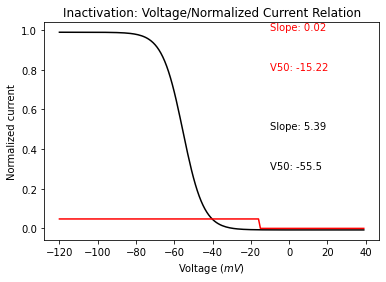

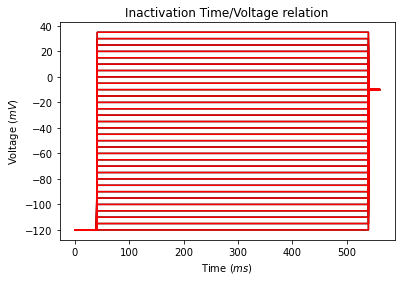

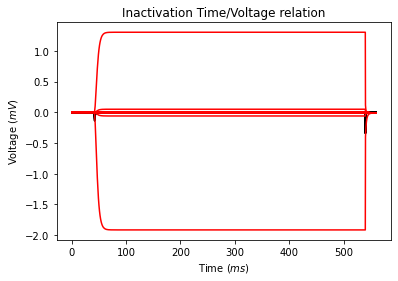

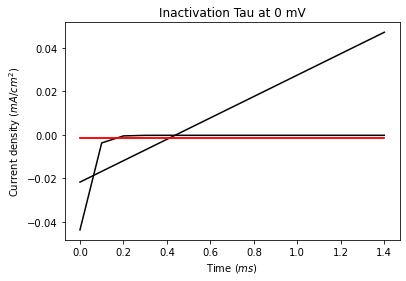

In [20]:

############################################################################################################

plt.figure()
plt.xlabel('Voltage $(mV)$')
plt.ylabel('Normalized current')
plt.title('Inactivation: Voltage/Normalized Current Relation')

set_param(param_values_wt)
wt_inact = ggsd.Inactivation(channel_name = 'na16')
wt_inact.genInactivation()
wt_inact.plotInactivation_VInormRelation_plt(plt, 'black')

set_param(new_params)
mut_inact = ggsd.Inactivation(channel_name = 'na16')
mut_inact.genInactivation()
mut_inact.plotInactivation_VInormRelation_plt(plt, 'red')


############################################################################################################
plt.figure()
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(mV)$')
plt.title('Inactivation Time/Voltage relation')

set_param(param_values_wt)
wt_inact = ggsd.Inactivation(channel_name = 'na16')
wt_inact.genInactivation()
wt_inact.plotInactivation_TimeVRelation_plt(plt, 'black')

set_param(new_params)
mut_inact = ggsd.Inactivation(channel_name = 'na16')
mut_inact.genInactivation()
mut_inact.plotInactivation_TimeVRelation_plt(plt, 'red')

############################################################################################################
plt.figure()
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(mV)$')
plt.title('Inactivation Time/Voltage relation')

set_param(param_values_wt)
wt_inact = ggsd.Inactivation(channel_name = 'na16')
wt_inact.genInactivation()
wt_inact.plotInactivation_TCurrDensityRelation(plt, 'black')

set_param(new_params)
mut_inact = ggsd.Inactivation(channel_name = 'na16')
mut_inact.genInactivation()
mut_inact.plotInactivation_TCurrDensityRelation(plt, 'red')

############################################################################################################
plt.figure()
plt.xlabel('Time $(ms)$')
plt.ylabel('Current density $(mA/cm^2)$')
plt.title('Inactivation Tau at 0 mV')

set_param(param_values_wt)
wt_inact = ggsd.Inactivation(channel_name = 'na16')
wt_inact.genInactivation()
wt_inact.plotInactivation_Tau_0mV_plt(plt, 'black')

set_param(new_params)
mut_inact = ggsd.Inactivation(channel_name = 'na16')
mut_inact.genInactivation()
mut_inact.plotInactivation_Tau_0mV_plt(plt, 'red')

/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/generalized_genSim_shorten_time.py:163: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/generalized_genSim_shorten_time.py:171: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/generalized_genSim_shorten_time.py:163: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not 

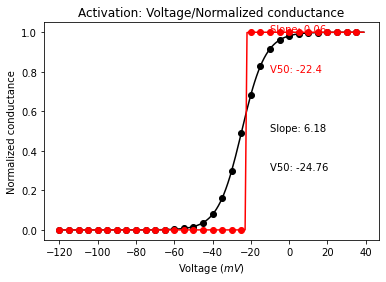

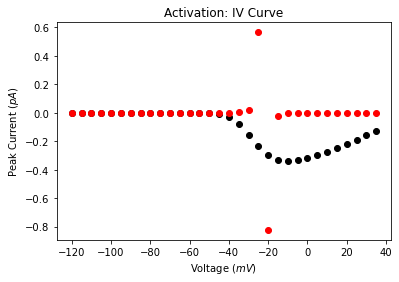

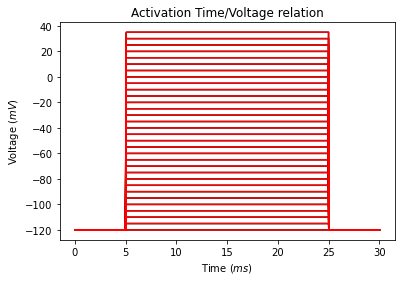

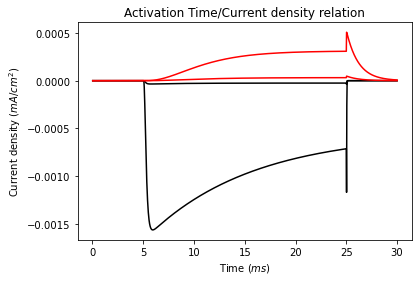

In [21]:
############################################################################################################
plt.figure()
plt.xlabel('Voltage $(mV)$')
plt.ylabel('Normalized conductance')
plt.title('Activation: Voltage/Normalized conductance')

set_param(param_values_wt)
wt_act = ggsd.Activation(channel_name = 'na16')
wt_act.genActivation()
wt_act.plotActivation_VGnorm_plt(plt, 'black')

set_param(new_params)
mut_act = ggsd.Activation(channel_name = 'na16')
mut_act.genActivation()
mut_act.plotActivation_VGnorm_plt(plt, 'red')

############################################################################################################
plt.figure()
plt.xlabel('Voltage $(mV)$')
plt.ylabel('Peak Current $(pA)$')
plt.title("Activation: IV Curve")

set_param(param_values_wt)
wt_act = ggsd.Activation(channel_name = 'na16')
wt_act.genActivation()
wt_act.plotActivation_IVCurve_plt(plt, 'black')

set_param(new_params)
mut_act = ggsd.Activation(channel_name = 'na16')
mut_act.genActivation()
mut_act.plotActivation_IVCurve_plt(plt, 'red')

############################################################################################################
plt.figure()
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(mV)$')
plt.title('Activation Time/Voltage relation')

set_param(param_values_wt)
wt_act = ggsd.Activation(channel_name = 'na16')
wt_act.genActivation()
wt_act.plotActivation_TimeVRelation_plt(plt, 'black')

set_param(new_params)
mut_act = ggsd.Activation(channel_name = 'na16')
mut_act.genActivation()
mut_act.plotActivation_TimeVRelation_plt(plt, 'red')

############################################################################################################
plt.figure()
plt.xlabel('Time $(ms)$')
plt.ylabel('Current density $(mA/cm^2)$')
plt.title('Activation Time/Current density relation')

set_param(param_values_wt)
wt_act = ggsd.Activation(channel_name = 'na16')
wt_act.genActivation()
wt_act.plotActivation_TCurrDensityRelation_plt(plt, 'black')

set_param(new_params)
mut_act = ggsd.Activation(channel_name = 'na16')
mut_act.genActivation()
mut_act.plotActivation_TCurrDensityRelation_plt(plt, 'red')

############################################################################################################


In [17]:
gv_slope, v_half, top, bottom = cf.calc_act_obj("na16", is_HMM=False)

/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/generalized_genSim_shorten_time.py:163: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/generalized_genSim_shorten_time.py:171: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))
/Users/jinanjiang/Documents/Berkeley/temp_delete/SimulatingVariants/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


In [3]:
print(v_half)
print(gv_slope)

-24.76279856030555
6.183933364396658


In [4]:
ssi_slope, v_half, top, bottom, tau0 = cf.calc_inact_obj("na16", is_HMM=False)

In [5]:
print(v_half)
print(ssi_slope)

-55.49616240483763
5.390056117452175


In [6]:
currh = ggsd.Activation(channel_name = 'na16').h

In [7]:
currh.sh_na16
#currh.gbar_na16
currh.tha_na16
currh.qa_na16
currh.Ra_na16
currh.Rb_na16
currh.thi1_na16
currh.thi2_na16
currh.qd_na16
currh.qg_na16
currh.mmin_na16
currh.hmin_na16
currh.q10_na16
currh.Rg_na16
currh.Rd_na16
currh.qq_na16
currh.tq_na16
currh.thinf_na16
currh.qinf_na16
currh.vhalfs_na16
currh.a0s_na16
currh.zetas_na16
currh.gms_na16
currh.smax_na16
currh.vvh_na16
currh.vvs_na16
#currh.ar2_na16
#currh.ena_na16
currh.Ena_na16

55.0

In [8]:
l1 = "[currh.sh_na16, currh.tha_na16, currh.qa_na16, currh.Ra_na16, currh.Rb_na16, currh.thi1_na16, currh.thi2_na16,"
l2 = " currh.qd_na16, currh.qg_na16, currh.mmin_na16, currh.hmin_na16, currh.q10_na16, currh.Rg_na16, currh.Rd_na16,"
l3 = " currh.qq_na16, currh.tq_na16, currh.thinf_na16, currh.qinf_na16, currh.vhalfs_na16, currh.a0s_na16,"
l4 = " currh.zetas_na16, currh.gms_na16, currh.smax_na16, currh.vvh_na16, currh.vvs_na16, currh.Ena_na16]"
param_list = l1 + l2 + l3 + l4

In [9]:
eval(param_list)

[8.0,
 -35.0,
 7.2,
 0.4,
 0.124,
 -45.0,
 -45.0,
 0.5,
 1.5,
 0.02,
 0.01,
 2.0,
 0.01,
 0.03,
 10.0,
 -55.0,
 -55.0,
 7.0,
 -60.0,
 0.0003,
 12.0,
 0.2,
 10.0,
 -58.0,
 2.0,
 55.0]

In [10]:
lst = []
cur = ''
flag = 0
for c in param_list:
    if c == ',':
        lst.append(cur)
        cur = ''
        flag = 1
    elif flag:
        flag = 0
        continue
    else:
        cur += c
print(lst) 

['[currh.sh_na16', 'currh.tha_na16', 'currh.qa_na16', 'currh.Ra_na16', 'currh.Rb_na16', 'currh.thi1_na16', 'currh.thi2_na16', 'currh.qd_na16', 'currh.qg_na16', 'currh.mmin_na16', 'currh.hmin_na16', 'currh.q10_na16', 'currh.Rg_na16', 'currh.Rd_na16', 'currh.qq_na16', 'currh.tq_na16', 'currh.thinf_na16', 'currh.qinf_na16', 'currh.vhalfs_na16', 'currh.a0s_na16', 'currh.zetas_na16', 'currh.gms_na16', 'currh.smax_na16', 'currh.vvh_na16', 'currh.vvs_na16']


In [11]:
param_list_str = ['currh.sh_na16', 'currh.tha_na16', 'currh.qa_na16', 'currh.Ra_na16', 'currh.Rb_na16', 'currh.thi1_na16', 'currh.thi2_na16', 'currh.qd_na16', 'currh.qg_na16', 'currh.mmin_na16', 'currh.hmin_na16', 'currh.q10_na16', 'currh.Rg_na16', 'currh.Rd_na16', 'currh.qq_na16', 'currh.tq_na16', 'currh.thinf_na16', 'currh.qinf_na16', 'currh.vhalfs_na16', 'currh.a0s_na16', 'currh.zetas_na16', 'currh.gms_na16', 'currh.smax_na16', 'currh.vvh_na16', 'currh.vvs_na16', 'currh.Ena_na16']

In [12]:
for i in param_list_str:
    print(eval(i))

8.0
-35.0
7.2
0.4
0.124
-45.0
-45.0
0.5
1.5
0.02
0.01
2.0
0.01
0.03
10.0
-55.0
-55.0
7.0
-60.0
0.0003
12.0
0.2
10.0
-58.0
2.0
55.0


In [13]:
import numpy as np
import bluepyopt as bpop
import matplotlib.pyplot as plt

class Vclamp_evaluator_HMM(bpop.evaluators.Evaluator):

    def __init__(self):
        
        # diff is mut - wild
        # first get baseline data points:
        # gv_slope, v_half, top, bottom = cf.calc_act_obj("na16", is_HMM=False)
        self.act_v_half = -24.762798580554502
        self.act_slope = 6.183933342983315
        # ssi_slope, v_half, top, bottom, tau0 = cf.calc_inact_obj("na16", is_HMM=False)
        self.inact_v_half = -55.49616240483763
        self.inact_slope = 5.390056117452175
        
        def init_params():
            param_list = []
            for param in param_list_str:
                max_or_min_diff = (eval(param) - 30, eval(param) + 30)
                max_or_min_ratio = (eval(param)/5, eval(param)*5)
                max_or_min_ratio = (eval(param) / 10, eval(param) * 10)
                # for a narrower bound
                min_bound = min(min(max_or_min_diff), min(max_or_min_ratio))
                max_bound = max(max(max_or_min_diff), max(max_or_min_ratio))
                param_list.append(bpop.parameters.Parameter(param[6:], value=eval(param), bounds=(min_bound, max_bound )))
            return param_list

        print("init called")
        self.objectives = []
        self.objectives.append(bpop.objectives.Objective("V_half_Act"))
        self.objectives.append(bpop.objectives.Objective("V_half_inact"))
        self.objectives.append(bpop.objectives.Objective("slope_Act"))
        self.objectives.append(bpop.objectives.Objective("slope_inact"))
        self.params = init_params()
        self.V_half_Act_diff_goal = 13.41
        self.V_half_inact_diff_goal = 18.83
        self.slope_Act_diff_goal = -2.108
        self.slope_inact_diff_goal = -0.962

    def evaluate_with_lists(self, param_values=[]):
        
        print("evaluate_with_lists is called")
        assert len(param_values) == len(param_list_str), 'no, they have to be equal...'
        
        currh.sh_na16 = param_values[0]
        currh.tha_na16 = param_values[1]
        currh.qa_na16 = param_values[2]
        currh.Ra_na16 = param_values[3]
        currh.Rb_na16 = param_values[4]
        currh.thi1_na16 = param_values[5]
        currh.thi2_na16 = param_values[6]
        currh.qd_na16 = param_values[7]
        currh.qg_na16 = param_values[8]
        currh.mmin_na16 = param_values[9]
        currh.hmin_na16 = param_values[10]
        currh.q10_na16 = param_values[11]
        currh.Rg_na16 = param_values[12]
        currh.Rd_na16 = param_values[13]
        currh.qq_na16 = param_values[14]
        currh.tq_na16 = param_values[15]
        currh.thinf_na16 = param_values[16]
        currh.qinf_na16 = param_values[17]
        currh.vhalfs_na16 = param_values[18]
        currh.a0s_na16 = param_values[19]
        currh.zetas_na16 = param_values[20]
        currh.gms_na16 = param_values[21]
        currh.smax_na16 = param_values[22]
        currh.vvh_na16 = param_values[23]
        currh.vvs_na16 = param_values[24]
        currh.Ena_na16 = param_values[25]
        
        gv_slope, act_v_half, top, bottom = cf.calc_act_obj("na16", is_HMM=False)
        V_half_Act_diff = act_v_half - self.act_v_half
        ssi_slope, inact_v_half, top, bottom, tau0 = cf.calc_inact_obj("na16", is_HMM=False)
        V_half_inact_diff = inact_v_half - self.inact_v_half
    
        
        
        '''
        return [(V_half_Act_diff/self.V_half_Act_diff_goal - 1)**2 * 1,
               (V_half_inact_diff/self.V_half_inact_diff_goal - 1)**2 * 1,
               (gv_slope/self.slope_Act_diff_goal - 1)**2 * 16,
               (ssi_slope/self.slope_inact_diff_goal - 1)**2 * 25]
            
        '''
        return [(V_half_Act_diff - self.V_half_Act_diff_goal)**2,
               (V_half_inact_diff - self.V_half_inact_diff_goal)**2,
               (gv_slope - self.slope_Act_diff_goal)**2,
               (ssi_slope - self.slope_inact_diff_goal)**2]



In [14]:
evaluator = Vclamp_evaluator_HMM()

init called


In [15]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
        print(halloffame[0])
        f = open('jinan_na16_log.txt', 'a')
        f.write(str(halloffame[0]) + '\n')
        f.close()
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    f = open('jinan_na16_log_ratio_scaled.txt', 'a')
    f.write(str(logbook) + '\n\n\n')
    f.close()
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [16]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof)
#, map_function=pool.map
#deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5, hof = hof)
cp_file = './cp.pkl'

In [ ]:
start_time = time.time()
#pop, hof, log, hst = deap_opt.run(max_ngen=5, cp_filename=cp_file)
pop, hof, log, hst = deap_opt.run(max_ngen=100, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

evaluate_with_lists is called
Couldn't generate activation data


/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:463: RuntimeWarning: invalid value encountered in true_divide
  self.inorm_vec = np.array(self.ipeak_vec) / ipeak_min


Couldn't fit curve to inactivation.
evaluate_with_lists is called


/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:163: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:171: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Couldn't fit curve to activation.
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called


/global/homes/j/jinan/.conda/envs/.env/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/global/homes/j/jinan/.conda/envs/.env/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/global/homes/j/jinan/.conda/envs/.env/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
ev

/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:1562: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))


evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called


/global/u1/j/jinan/SimulatingVariants/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Couldn't fit curve to activation.
Couldn't fit curve to inactivation.
evaluate_with_lists is called
evaluate_with_lists is called
evaluate_with_lists is called
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't gener

/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:1547: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/u1/j/jinan/SimulatingVariants/generalized_genSim_shorten_time.py:1547: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c


evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
evaluate_with_lists is called
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't generate activation data
Couldn't fit curve to inactivation.
evaluate_with_lists is called
Couldn't

In [ ]:
for i in hof[0]:
    print(i)

In [ ]:
best_indvs